In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn import metrics

## 1. Pre-process the dataset.

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.describe(include= 'all')

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


In [4]:
# converting to unix time stamp

# optional step insted of this just remove column of time using  df.drop('pickup_datetime',axis=1)


import datetime    
import time

df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x : x[:-4])
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())

df['pickup_datetime'] = [convert_to_unix(x) for x in df['pickup_datetime'].values]




In [5]:
df.drop(['Unnamed: 0','key'] ,axis=1 ,inplace = True)   # dropping columns which are not helpful in prediction of prices

In [6]:
df.isnull().sum()   # checking for null values

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
# replacing null values with mean

df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())

In [8]:
# checking for null values

df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## 2. Identify outliers.

<AxesSubplot:xlabel='fare_amount'>

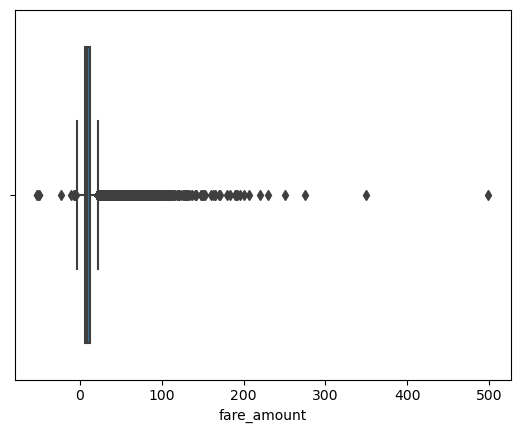

In [9]:
sns.boxplot(x=df['fare_amount'])   # checking outliers in fare amount

## 3. Check the correlation.

<AxesSubplot:>

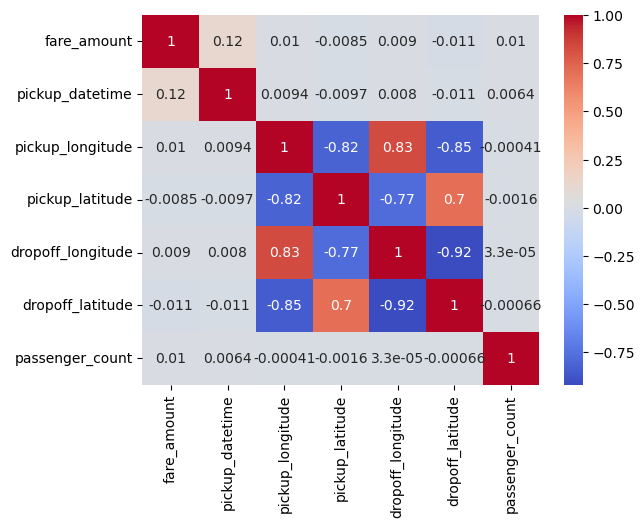

In [10]:
corelation = df.corr()
sns.heatmap(corelation,annot=True,cmap='coolwarm')

## 4. Implement linear regression and random forest regression models.

In [11]:
x = df.drop('fare_amount',axis = 1)
y = df['fare_amount']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [13]:
# Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)


In [14]:
from sklearn.metrics import r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

r2 = r2_score(y_test,y_pred)
rmse1 = rmse(y_pred,y_test)

In [15]:
print("r2 : ",r2)
print("RMSE : ",rmse1)

r2 :  0.013140616479079714
RMSE :  9.93399475214704


In [16]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [17]:
r2 = r2_score(y_test,y_pred)
x = rmse(y_pred,y_test)

In [18]:
print("r2 : ",r2)
print("RMSE : ",x)

r2 :  0.7314762341943291
RMSE :  5.18188360091115
